<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/fig2_datafull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
import pandas as pd

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
import pandas as pd
#a1=pd.read_csv('/content/drive/MyDrive/is the us/fig2_datafull.csv',encoding = "cp932")

fileDownloaded = drive.CreateFile({'id': '1tO5iXUPcHCN-HopTpwhwJc7u7cD879AT'})
fileDownloaded.GetContentFile('data.csv')

a1 = pd.read_csv('data.csv',encoding = "cp932")

In [9]:
a1.head()

,日経会社コード,企業名称,株式コード,決算期,決算種別,連結基準,<貸借対照表（資産）>資産合計(百万円)[B110],<その他項目>設備投資額［累計］(百万円)[H034],<その他項目>研究開発費［累計］(百万円)[H033]
0,5,宝幸,9999,1985/01,10,1,48088.0,NaN,NaN
1,5,宝幸,9999,1986/01,10,1,48518.0,NaN,NaN
2,5,宝幸,9999,1987/01,10,1,49672.0,NaN,NaN
3,5,宝幸,9999,1988/01,10,1,54919.0,NaN,NaN
4,5,宝幸,9999,1988/09,10,1,55581.0,NaN,NaN


In [10]:
a1 = a1.drop(columns={'決算種別'})
a1 = a1.drop(columns={'連結基準'})
a1 = a1.drop(columns={'企業名称'})	
a1 = a1.drop(columns={'日経会社コード'})

In [11]:
a1 = a1.rename(columns={'決算期':'AP'})
a1 = a1.rename(columns={'<貸借対照表（資産）>資産合計(百万円)[B110]':'assets'})
a1 = a1.rename(columns={'<その他項目>設備投資額［累計］(百万円)[H034]':'Capital expenditures'})
a1 = a1.rename(columns={'<その他項目>研究開発費［累計］(百万円)[H033]':'R&D'})

In [12]:
a1.head()

,株式コード,AP,assets,Capital expenditures,R&D
0,9999,1985/01,48088.0,NaN,NaN
1,9999,1986/01,48518.0,NaN,NaN
2,9999,1987/01,49672.0,NaN,NaN
3,9999,1988/01,54919.0,NaN,NaN
4,9999,1988/09,55581.0,NaN,NaN


In [13]:
a1['fyear'] = a1['AP'].str[:4]
a1['fyear'] = a1['fyear'].astype(int)

In [14]:
a1.head()

,株式コード,AP,assets,Capital expenditures,R&D,fyear
0,9999,1985/01,48088.0,NaN,NaN,1985
1,9999,1986/01,48518.0,NaN,NaN,1986
2,9999,1987/01,49672.0,NaN,NaN,1987
3,9999,1988/01,54919.0,NaN,NaN,1988
4,9999,1988/09,55581.0,NaN,NaN,1988


In [15]:
a1 = a1.drop(columns={'AP'})

In [16]:
a1.head()

,株式コード,assets,Capital expenditures,R&D,fyear
0,9999,48088.0,NaN,NaN,1985
1,9999,48518.0,NaN,NaN,1986
2,9999,49672.0,NaN,NaN,1987
3,9999,54919.0,NaN,NaN,1988
4,9999,55581.0,NaN,NaN,1988


In [17]:
a1["R&D/ASSETS"]=a1["R&D"]/a1["assets"]

In [18]:
a1["Capital expenditures/ASSETS"]=a1["Capital expenditures"]/a1["assets"]

In [19]:
a1.head()

,株式コード,assets,Capital expenditures,R&D,fyear,R&D/ASSETS,Capital expenditures/ASSETS
0,9999,48088.0,NaN,NaN,1985,NaN,NaN
1,9999,48518.0,NaN,NaN,1986,NaN,NaN
2,9999,49672.0,NaN,NaN,1987,NaN,NaN
3,9999,54919.0,NaN,NaN,1988,NaN,NaN
4,9999,55581.0,NaN,NaN,1988,NaN,NaN


In [50]:
a1 = a1.dropna(how='all').dropna(how='all', axis=1)
print(a1)

       fyear  level_0  index  株式コード   assets  Capital expenditures    R&D  \
0       1985        0      0   9999  48088.0                   NaN    NaN   
1       1986        1      1   9999  48518.0                   NaN    NaN   
2       1987        2      2   9999  49672.0                   NaN    NaN   
3       1988        3      3   9999  54919.0                   NaN    NaN   
4       1988        4      4   9999  55581.0                   NaN    NaN   
...      ...      ...    ...    ...      ...                   ...    ...   
41555   2002    41555  41555   9999  40567.0                1673.0  507.0   
41556   2003    41556  41556   9999  24662.0                 464.0  427.0   
41557   2004    41557  41557   9999  20431.0                 205.0  355.0   
41558   2005    41558  41558   9999  12187.0                 109.0  233.0   
41559   2006    41559  41559   9999   9416.0                 107.0  161.0   

       R&D/ASSETS  Capital expenditures/ASSETS  
0             NaN         

In [76]:
print(a1.dropna(how='any'))

       fyear  level_0  index  株式コード   assets  Capital expenditures    R&D  \
16      2000       16     16   9999  35696.0                 323.0  227.0   
17      2001       17     17   9999  34363.0                 952.0  210.0   
25      2000       25     25   7021  15792.0                 577.0   31.0   
26      2001       26     26   7021  15865.0                 518.0   32.0   
27      2002       27     27   7021  13653.0                 697.0   29.0   
...      ...      ...    ...    ...      ...                   ...    ...   
41555   2002    41555  41555   9999  40567.0                1673.0  507.0   
41556   2003    41556  41556   9999  24662.0                 464.0  427.0   
41557   2004    41557  41557   9999  20431.0                 205.0  355.0   
41558   2005    41558  41558   9999  12187.0                 109.0  233.0   
41559   2006    41559  41559   9999   9416.0                 107.0  161.0   

       R&D/ASSETS  Capital expenditures/ASSETS  
16       0.006359         

In [81]:
a1.dropna(subset=['Capital expenditures'], inplace=True)
print(a1)

       fyear  level_0  index  株式コード   assets  Capital expenditures    R&D  \
16      2000       16     16   9999  35696.0                 323.0  227.0   
17      2001       17     17   9999  34363.0                 952.0  210.0   
25      2000       25     25   7021  15792.0                 577.0   31.0   
26      2001       26     26   7021  15865.0                 518.0   32.0   
27      2002       27     27   7021  13653.0                 697.0   29.0   
...      ...      ...    ...    ...      ...                   ...    ...   
41555   2002    41555  41555   9999  40567.0                1673.0  507.0   
41556   2003    41556  41556   9999  24662.0                 464.0  427.0   
41557   2004    41557  41557   9999  20431.0                 205.0  355.0   
41558   2005    41558  41558   9999  12187.0                 109.0  233.0   
41559   2006    41559  41559   9999   9416.0                 107.0  161.0   

       R&D/ASSETS  Capital expenditures/ASSETS  
16       0.006359         

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [84]:
dataone = a1.groupby(['fyear'])[['R&D/ASSETS']]
datatwo = a1.groupby(['fyear'])[['Capital expenditures/ASSETS']]

In [85]:
grouped = a1.groupby('fyear').mean()

In [86]:
grouped

,level_0,index,株式コード,assets,Capital expenditures,R&D,R&D/ASSETS,Capital expenditures/ASSETS
fyear,,,,,,,,
1999,24994.000000,24994.000000,7188.166667,1.458588e+06,66331.833333,73579.000000,0.030231,0.053728
2000,19861.276175,19861.276175,6982.554823,2.355443e+05,11276.725474,7912.327022,0.023025,0.039109
2001,20071.723370,20071.723370,6906.181240,2.418289e+05,12068.050079,8017.714992,0.023230,0.043145
2002,20324.212800,20324.212800,6849.808800,2.391865e+05,11729.090400,8489.755795,0.024887,0.039885
2003,20561.787268,20561.787268,6742.024174,2.403890e+05,10848.060435,8767.422464,0.025464,0.036569
2004,20880.508929,20880.508929,6678.113636,2.464515e+05,11629.935065,9091.530303,0.026238,0.038178
2005,21161.473811,21161.473811,6607.535052,2.576787e+05,13651.398066,9416.103101,0.025635,0.043365
2006,21499.057234,21499.057234,6561.627981,2.792034e+05,15914.196343,9905.368595,0.025060,0.045945
2007,21752.119557,21752.119557,6527.363420,3.003212e+05,17749.874109,10408.542387,0.024703,0.048413


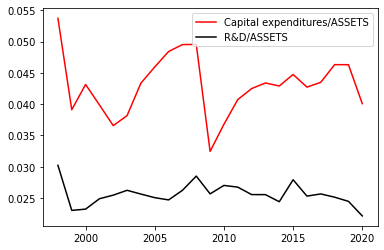

In [87]:
c=list(range(1998,2021))
plt.plot(c, grouped['Capital expenditures/ASSETS'],c='r',label='Capital expenditures/ASSETS')
plt.plot(c, grouped['R&D/ASSETS'],c='k',label='R&D/ASSETS')
plt.legend()